# Funnerl Analysis

A e-commerce website has customer funnels as follows
1. Home page
2. Search page
3. Payment Page
4. Confirmation page

This analysis figures out how to improve conversion rate, by analyzing each funnel step for mobile users and desktop users.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

In [9]:
table0_users = pd.read_csv('Funnel/user_table.csv')
table1_home = pd.read_csv('Funnel/home_page_table.csv')
table2_search = pd.read_csv('Funnel/search_page_table.csv')
table3_payment = pd.read_csv('Funnel/payment_page_table.csv')
table4_confirm = pd.read_csv('Funnel/payment_confirmation_table.csv')

In [28]:
table1_home.shape

(90400, 2)

In [76]:
table01 = pd.merge(table0_users, table1_home, on='user_id', how='left')
table012 = pd.merge(table01, table2_search, on='user_id', how='left')
table0123 = pd.merge(table012, table3_payment, on='user_id', how='left')
table01234 = pd.merge(table0123, table4_confirm, on='user_id', how='left')
table01234.columns = ['user_id', 'date', 'device', 'sex', 'home_page', 'search_page', 'payment_page', 'confirm_page']

In [77]:
table01234.head()

,user_id,date,device,sex,home_page,search_page,payment_page,confirm_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [78]:
table01234.iloc[:,-4:] = table01234.iloc[:,-4:].notnull().astype('int')

In [80]:
table01234.head()

,user_id,date,device,sex,home_page,search_page,payment_page,confirm_page
0,450007,2015-02-28,Desktop,Female,1,0,0,0
1,756838,2015-01-13,Desktop,Male,1,0,0,0
2,568983,2015-04-09,Desktop,Male,1,1,0,0
3,190794,2015-02-18,Desktop,Female,1,1,0,0
4,537909,2015-01-15,Desktop,Male,1,0,0,0


In [99]:
home_page_by_device = table01234[['device', 'home_page']].groupby('device').sum().reset_index()
home_page_by_sex = table01234[['sex', 'home_page']].groupby('sex').sum().reset_index()

search_page_by_device = table01234[['device', 'search_page']].groupby('device').sum().reset_index()
search_page_by_sex = table01234[['sex', 'search_page']].groupby('sex').sum().reset_index()

payment_page_by_device = table01234[['device', 'payment_page']].groupby('device').sum().reset_index()
payment_page_by_sex = table01234[['sex', 'payment_page']].groupby('sex').sum().reset_index()

confirm_page_by_device = table01234[['device', 'confirm_page']].groupby('device').sum().reset_index()
confirm_page_by_sex = table01234[['sex', 'confirm_page']].groupby('sex').sum().reset_index()

In [125]:
by_device = pd.concat([home_page_by_device, search_page_by_device.iloc[:,1], payment_page_by_device.iloc[:,1], 
                       confirm_page_by_device.iloc[:,1]], axis=1)

by_sex = pd.concat([home_page_by_sex, search_page_by_sex.iloc[:,1], payment_page_by_sex.iloc[:,1], 
                       confirm_page_by_sex.iloc[:,1]], axis=1)

by_device['conv_s2h'] = by_device['search_page']/by_device['home_page']
by_device['conv_p2s'] = by_device['payment_page']/by_device['search_page']
by_device['conv_c2p'] = by_device['confirm_page']/by_device['payment_page']

by_sex['conv_s2h'] = by_sex['search_page']/by_sex['home_page']
by_sex['conv_p2s'] = by_sex['payment_page']/by_sex['search_page']
by_sex['conv_c2p'] = by_sex['confirm_page']/by_sex['payment_page']


In [129]:
by_device


,device,home_page,search_page,payment_page,confirm_page,conv_s2h,conv_p2s,conv_c2p
0,Desktop,60200,30100,3010,150,0.5,0.1,0.049834
1,Mobile,30200,15100,3020,302,0.5,0.2,0.100000


In [130]:
by_sex

,sex,home_page,search_page,payment_page,confirm_page,conv_s2h,conv_p2s,conv_c2p
0,Female,45075,22676,3100,241,0.503073,0.136708,0.077742
1,Male,45325,22524,2930,211,0.496944,0.130083,0.072014


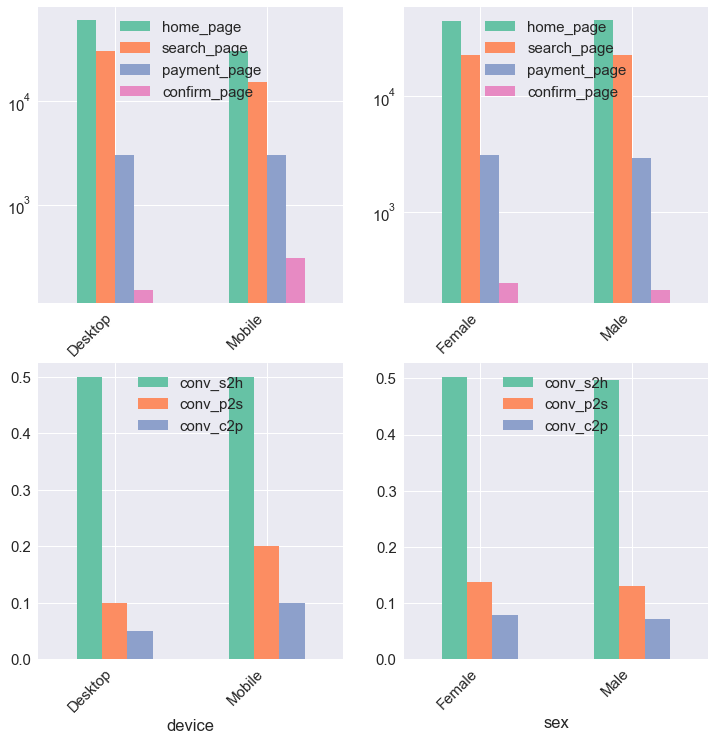

In [142]:
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(2,2,1)
by_device.iloc[:,:5].plot.bar(x='device', ax=ax1)
#plt.set_xticklabels(by_device['device'])
plt.yscale('log')
plt.xticks(rotation=45,ha='right')
plt.legend(loc='upper center')

ax2 = fig.add_subplot(2,2,2)
by_sex.iloc[:,:5].plot.bar(x='sex', ax=ax2)
plt.yscale('log')
plt.xticks(rotation=45,ha='right')
plt.legend(loc='upper center')

ax3 = fig.add_subplot(2,2,3)
by_device[['device', 'conv_s2h', 'conv_p2s', 'conv_c2p']].plot.bar(x='device', ax=ax3)
plt.yscale('linear')
plt.xticks(rotation=45,ha='right')
plt.legend(loc='upper center')

ax4 = fig.add_subplot(2,2,4)
by_sex[['sex', 'conv_s2h', 'conv_p2s', 'conv_c2p']].plot.bar(x='sex', ax=ax4)
plt.yscale('linear')
plt.xticks(rotation=45,ha='right')
plt.legend(loc='upper center')


### Conclusion:
### Desktop has more users than mobile, but the conversion rates from search page to payment page, and from payment page to confirmation page are higher for mobile users. It's best if we can target these desktop users and find out the reason why they are not convertion. 